In [1]:
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'pandas'

## Đọc dữ liệu Spotify
Đọc file dữ liệu `spotify.csv` và đánh giá dữ liệu

In [21]:
### your code here
df = pd.read_csv("spotify.csv")
df.head()

,Date,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
0,2017-01-06,12287078,NaN,NaN,NaN,NaN
1,2017-01-07,13190270,NaN,NaN,NaN,NaN
2,2017-01-08,13099919,NaN,NaN,NaN,NaN
3,2017-01-09,14506351,NaN,NaN,NaN,NaN
4,2017-01-10,14275628,NaN,NaN,NaN,NaN


In [22]:
df.tail()

,Date,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
361,2018-01-05,4492978,3450315.0,2408365.0,2685857.0,2869783.0
362,2018-01-06,4416476,3394284.0,2188035.0,2559044.0,2743748.0
363,2018-01-07,4009104,3020789.0,1908129.0,2350985.0,2441045.0
364,2018-01-08,4135505,2755266.0,2023251.0,2523265.0,2622693.0
365,2018-01-09,4168506,2791601.0,2058016.0,2727678.0,2627334.0


In [23]:
df.dtypes

Date                         object
Shape of You                  int64
Despacito                   float64
Something Just Like This    float64
HUMBLE.                     float64
Unforgettable               float64
dtype: object

Dữ liệu có các cột:
* Cột `Date` có dữ liệu bắt đầu từ tháng 1, 2017 đến tháng 1, 2018
* 05 cột còn lại tương ứng với 05 bài hát (Shape of You, Despacito, Something Just Like This,...).

Ở mỗi hàng là dữ liệu số lượt nghe của các bài hát vào ngày tương ứng.

In [24]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df.dtypes

Date                        datetime64[ns]
Shape of You                         int64
Despacito                          float64
Something Just Like This           float64
HUMBLE.                            float64
Unforgettable                      float64
dtype: object

In [7]:
df.head()

,Date,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
0,2017-01-06,12287078,NaN,NaN,NaN,NaN
1,2017-01-07,13190270,NaN,NaN,NaN,NaN
2,2017-01-08,13099919,NaN,NaN,NaN,NaN
3,2017-01-09,14506351,NaN,NaN,NaN,NaN
4,2017-01-10,14275628,NaN,NaN,NaN,NaN


## Biểu đồ đường (Line Chart)

Để biểu diễn dữ liệu trên, ta sẽ sử dụng biểu đồ đường.
Line chart được sử dụng để:
* Kết nối các điểm dữ liệu riêng lẻ
* Thể hiện xu hướng (trend) của một chuỗi dữ liệu

Ví dụ sau sử dụng thuộc tính `.plot` để vẽ biểu đồ đường của dữ liệu lượt nghe theo thời gian.

<Axes: xlabel='Date'>

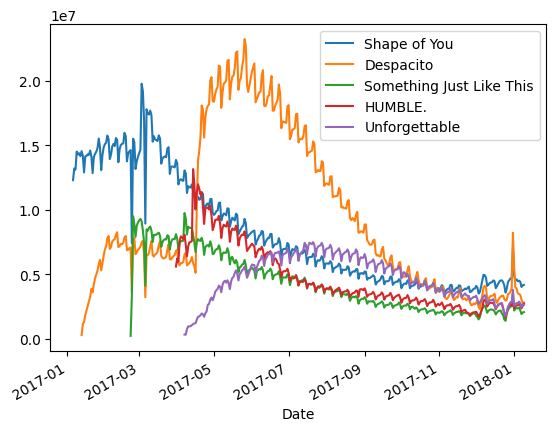

In [25]:
df.plot.line(x="Date")

Để tuỳ chỉnh được nhiều thuộc tính của biểu đồ, có thể sử dụng thư viện `matplotlib`

In [26]:
df.head()

,Date,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
0,2017-01-06,12287078,NaN,NaN,NaN,NaN
1,2017-01-07,13190270,NaN,NaN,NaN,NaN
2,2017-01-08,13099919,NaN,NaN,NaN,NaN
3,2017-01-09,14506351,NaN,NaN,NaN,NaN
4,2017-01-10,14275628,NaN,NaN,NaN,NaN


In [30]:
import matplotlib.pyplot as plt

Thư viện `matplotlib` hỗ trợ chỉnh sửa một số các thuộc tính của biểu đồ như:
* `figure(figsize=(h,w))`: Tạo biểu đồ và thay đổi kích thước bằng tham số `figsize` (đơn vị inch)
* `legend`: Hiển thị nhãn của các cột
* `xlabel`, `ylabel`: Hiển thị nhãn của trục `x`, `y`
* `title`: Hiển thị tên của biểu đồ

Sau khi chỉnh sửa các thuộc tính của biểu đồ, luôn cần lệnh `plt.show()` để hiển thị biểu đồ ra output.

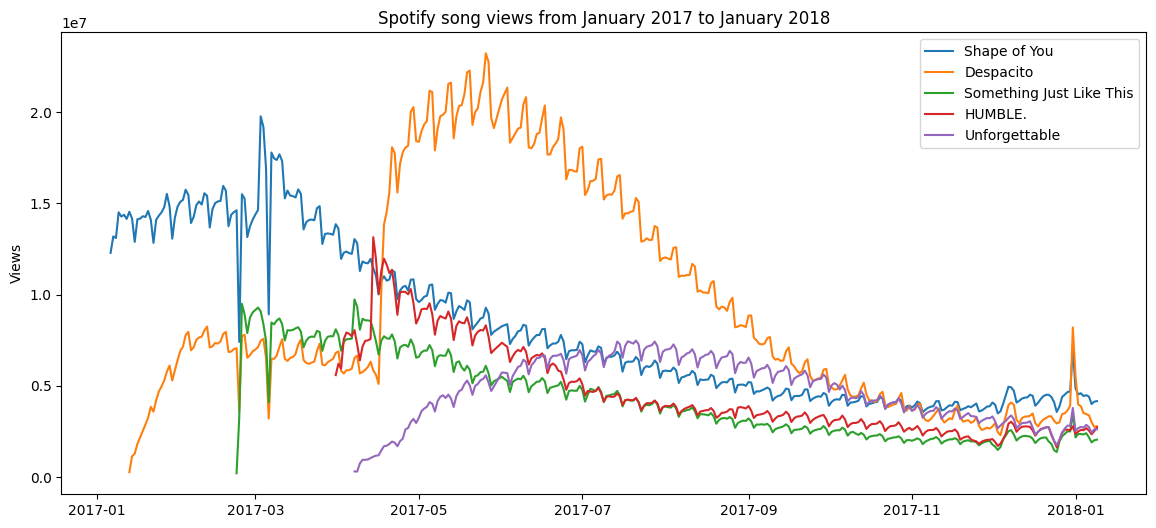

In [10]:
plt.figure(figsize=(14,6))

df_line = df.set_index("Date")
plt.plot(df_line)

plt.legend(df_line.columns)
plt.ylabel("Views")
plt.title("Spotify song views from January 2017 to January 2018")
plt.show()

## Biểu diễn dữ liệu Forbes' 2024 Billionaires
Sử dụng dữ liệu `Billionaires.csv` và kết quả phân tích từ buổi trước.
## Biểu đồ cột (Bar Chart)
Tính tổng "Net Worth" theo lĩnh vực "Industry"

In [32]:
df = pd.read_csv("Billionaires.csv")

def clean_networth(networth):
    return networth[1:-1]

# df["Net Worth"] = df["Net Worth"].apply(lambda x: x[1:-1])
df["Net Worth"] = df["Net Worth"].apply(clean_networth)
df["Net Worth"] = pd.to_numeric(df["Net Worth"])
df.head()

,Rank,Name,Net Worth,Age,Country | Territory,Source,Industry
0,1,Bernard Arnault & family,211.0,74.0,France,LVMH,Fashion & Retail
1,2,Elon Musk,180.0,51.0,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,114.0,59.0,United States,Amazon,Technology
3,4,Larry Ellison,107.0,78.0,United States,Oracle,Technology
4,5,Warren Buffett,106.0,92.0,United States,Berkshire Hathaway,Finance & Investments


In [12]:
df_industry= df[["Industry", "Net Worth"]].groupby("Industry").sum()
df_industry = df_industry.sort_values(by='Net Worth', ascending=False)
df_industry

,Net Worth
Industry,
Technology,1871.0
Fashion & Retail,1698.8
Finance & Investments,1605.1
Manufacturing,1025.9
Food & Beverage,957.2
Diversified,905.2
Real Estate,657.4
Healthcare,643.2
Automotive,525.3


In [13]:
df_industry.dtypes

Net Worth    float64
dtype: object

### Biểu đồ cột biểu diễn top 10 tổng lượng tài sản theo lĩnh vực
* Mỗi cột đại diện cho một lĩnh vực
* Tổng tài sản của lĩnh vực được biểu diễn bằng độ cao của cột

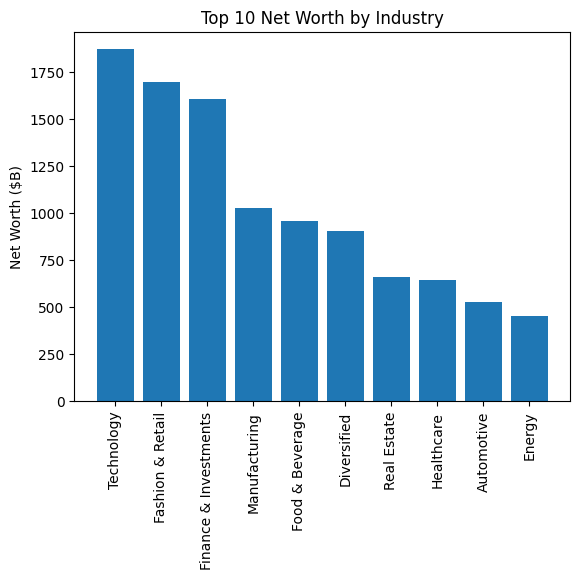

In [14]:
df_topindustry = df_industry[:10]
plt.bar(x=df_topindustry.index, height=df_topindustry["Net Worth"])

plt.xticks(rotation=90)
plt.ylabel("Net Worth ($B)")
plt.title("Top 10 Net Worth by Industry")
plt.show()

## Biểu đồ Tần suất (Histogram)

### Biểu đồ tần suất biểu diễn phân phối tuổi của các tỷ phú


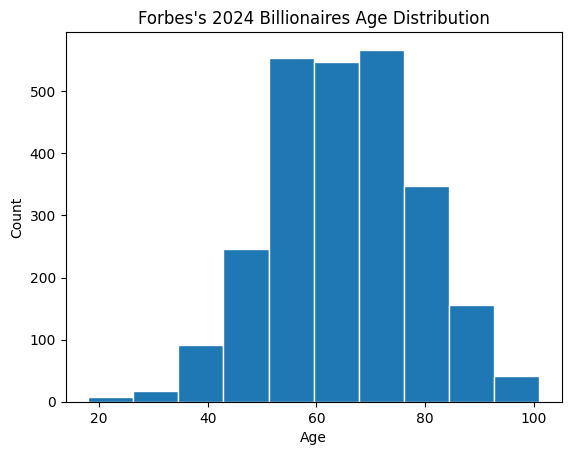

In [37]:
plt.hist(
    x=df["Age"], 
    edgecolor='white'
    )
plt.title("Forbes's 2024 Billionaires Age Distribution")
plt.ylabel("Count")
plt.xlabel("Age")
plt.show()

## Biểu đồ phân tán (Scatter Plot)

### Biểu đồ phân tán biểu diễn mối quan hệ giữa tuổi tác và tổng tài sản
* Mỗi điểm dữ liệu thể hiện 2 giá trị: tuổi và tổng tài sản
* Tập hợp các điểm dữ liệu biểu diễn phân phối giữa tuổi tác và tổng tài sản

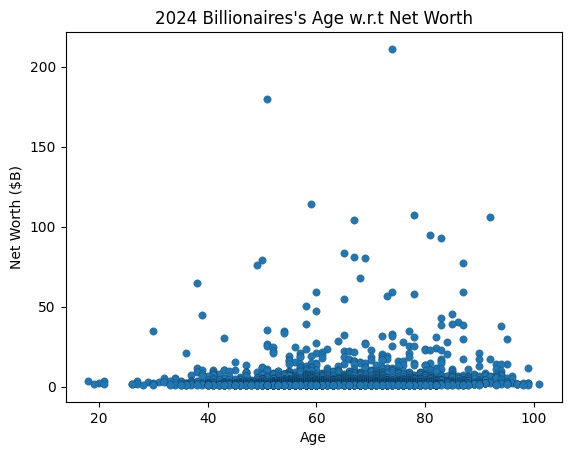

In [39]:
plt.scatter(
    x=df["Age"],
    y=df["Net Worth"],
    s=30,
    linewidths=0.1,
    edgecolors='black'
)
plt.title("2024 Billionaires's Age w.r.t Net Worth")
plt.xlabel("Age")
plt.ylabel("Net Worth ($B)")
plt.show()

## Biểu đồ hộp (Box Plot)
Sử dụng lại kết quả nhóm theo châu lục.


In [17]:
import pycountry_convert as pc

def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    
    except:
        print(country_name)
        return "Unknown"

df["Country | Territory"] = df["Country | Territory"].replace({"Eswatini (Swaziland)":"Swaziland"})
df["Continent"] = df["Country | Territory"].apply(get_continent)

### Biểu đồ hộp biểu diễn phân phối top tài sản (>50 tỷ) theo châu lục
* Mỗi hộp thể hiện phân phối của một châu lục
* Đường màu cam ở giữa thế hiện giá trị median

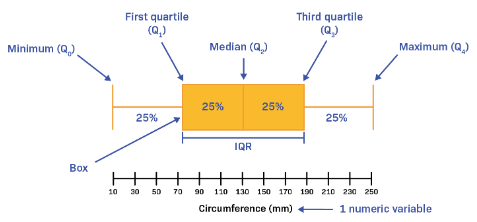

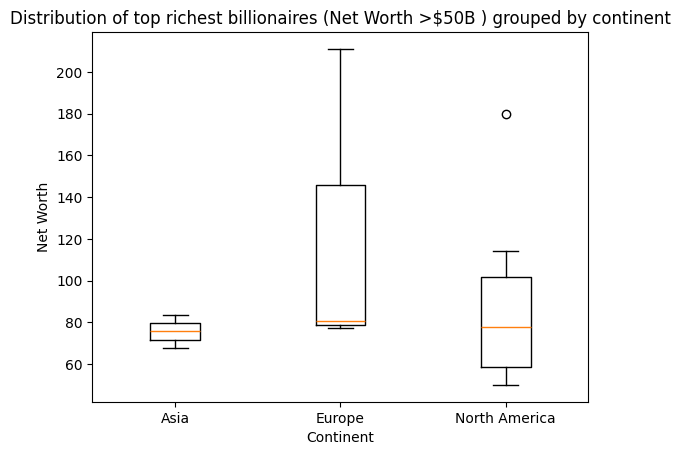

In [18]:
grouped = df[df["Net Worth"]>50].groupby('Continent')['Net Worth'].apply(list)
plt.boxplot(grouped, tick_labels=grouped.index)
plt.xlabel('Continent')
plt.ylabel('Net Worth')
plt.title("Distribution of top richest billionaires (Net Worth >$50B ) grouped by continent")
plt.show()